### I. Perkenalan

```
    Nama : Amsiki Bagus R.
    Batch : RMT-001
    Milestone 2

Notebook ini digunakan untuk melakukan analisa terhadap data penjualan nike tahun 2020-2021. Hasil analisa data digunakan untuk strategi pemasaran yang efektif di masa depan.
```

### II. Identifikasi Masalah

```
Latar Belakang Masalah 
```
Sebagai seorang data analyst, saya diminta untuk melakukan analisis terhadap dataset penjualan Nike dengan mengevaluasi kenaikan penjualan produk yang terjadi. Menganalisis data penjualan sepatu Nike untuk memahami faktor-faktor yang mendorong kenaikan penjualan sebesar 7 kali lipat dari tahun 2020 ke 2021. Hal ini menunjukkan pertumbuhan yang signifikan dalam performa penjualan produk Nike selama satu tahun terakhir. 

Kenaikan penjualan yang signifikan menunjukkan adanya potensi pertumbuhan bisnis. Ini menjadi dorongan untuk lebih memperhatikan faktor-faktor yang bisa berkontribusi terhadap pertumbuhan ini, serta untuk mencari cara agar pertumbuhan ini dapat dipertahankan dan ditingkatkan di masa depan.

Analisis bisnis dapat digunakan untuk memahami perubahan pola konsumen yang mendasari peningkatan penjualan. Fokus pada evaluasi pola konsumen, efektivitas strategi pemasaran sebelumnya, dan identifikasi peluang untuk mempertahankan serta meningkatkan pertumbuhan penjualan di masa depan.

```
Tujuan Bisnis
```
Menambah pendapatan dengan analisis data penjualan Produk Sepatu Nike untuk strategi pemasaran yang efektif di masa depan

```
Problem Statement
```

Problem Statement konteks bisnis dengan framework **SMART**

- **Spesific** : mempertahankan serta meningkatkan pertumbuhan penjualan di masa depan.
- **Measure** : meningkatkan 10% penjualan dalam Q1 tahun depan.
- **Achievable** : Menggunakan hasil analisis untuk menyusun strategi pemasaran yang lebih efektif menerapkan metode analisis yang relevan seperti segmentasi pelanggan, analisis tren, dan evaluasi strategi pemasaran guna mempertahankan dan meningkatkan tren pertumbuhan penjualan.
- **Relevant** : Fokus pada strategi yang dapat membantu Nike menjaga momentum pertumbuhan, mengingat peningkatan signifikan dalam performa penjualan sebelumnya.
- **Time-Bound** : Q1 tahun depan

**Problem Statement** : meningkatkan volume penjualan dengan cara Fokus pada strategi dengan target 10% di Q1 tahun depan Untuk memastikan pertumbuhan yang berkelanjutan, diperlukan analisis mendalam terhadap pola konsumen, efektivitas strategi pemasaran sebelumnya, dan potensi peluang pasar di masa depan. Hal ini bertujuan untuk mengidentifikasi langkah-langkah strategis yang dapat mempertahankan dan bahkan meningkatkan penjualan secara konsisten.

```
Penjabaran Masalah
```
Dari data yang ada didapatkan beberapa pertanyaan bisnis yang diantaranya:

- Apa produk Nike yang paling laris terjual? deskriptip
- Bagaimana trend penjualan di tahun 2020 - 2021 setiap bulannya? deskriptip
- Produk apa yang paling sering terjual di setiap wilayah?
- Wilayah mana yang memiliki kontribusi terbesar terhadap total penjualan?
- Apakah ada perbedaan yang signifikan antara penjualan dengan sales method offline dan online? inversial 
- Apakah ada perbedaan rata-rata Total Sales di berbagai Region (Wilayah)? inversial 




### III. Data Loading ###

Import Liblary yang di perlukan

In [172]:
# Import Liblary ang diperlukan
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# import database
df = pd.read_csv('/Users/bagusa/Documents/CODA/MILESTONE/M2/p1-coda001-rmt-m2-Bagusaaa/Nike_Dataset.csv')
df.head()

,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
0,01-01-2020,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,02-01-2020,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,03-01-2020,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,04-01-2020,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,05-01-2020,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90


Dalam kasus kali ini, semua data dalam dataset dibutuhkan dan akan mengakses kolom-kolom yang dibutuhkan. Kolom tersebut antara lain:

- Invoice Date - Tanggal transaksi penjualan
- Product - Nama produk 
- Region - Wilayah geografis 
- Retailer - Nama toko tempat transaksi
- Sales Method - Metode penjualan yang digunakan dalam transaksi
- State - Negara bagian di AS dimana transaksi penjualan terjadi.
- Price per Unit - Harga per unit
- Total Sales - Total pendapatan yang dihasilkan dari transaksi penjualan
- Units Sold - Jumlah unit yang terjual dalam transaksi

### IV. Data Cleaning

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Invoice Date    9360 non-null   object
 1   Product         9360 non-null   object
 2   Region          9360 non-null   object
 3   Retailer        9360 non-null   object
 4   Sales Method    9360 non-null   object
 5   State           9360 non-null   object
 6   Price per Unit  9360 non-null   int64 
 7   Total Sales     9360 non-null   int64 
 8   Units Sold      9360 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 658.2+ KB


```Data bersih tidak ada null```

Data sudah bersih dari missing values namun masih terdapat kolom yang belum sesuai dengan type datanya. Untuk menangani hal tersebut perlu dilakukan perubahan type data terhadap kolom Invoice Date & mengubah nama kolom menjadi 1 kalimat, yang sebelumnya "Sales Method" menjadi "sales_method" untuk memudahkan dalam pengolahan data.

In [175]:
#mengubah nama kolom menjadi 1 kalimat, yang sebelumnya "Sales Method" menjadi "sales_method" untuk memudahkan dalam pengolahan data
df = df.rename(columns={"Invoice Date": "invoice_date", "Product": "product", "Region": "region", "Retailer": "retailer", "Sales Method": "sales_method", "State": "state", "Price per Unit": "price_per_unit", "Total Sales": "total_sales", "Units Sold":"units_sold"  })

#mengubah type kolom `Invoice Date` menjadi tipe data datetime
#df['invoice_date'] = df['invoice_date'].astype('datetime64') #Change the datatype into datetime
df['invoice_date'] = df['invoice_date'].astype('datetime64[ns]')




In [176]:
df['total_sales']  = df['total_sales'].astype('int') 
#df = df.set_index('invoice_date') #This step is important in time series. Date column has to be index

In [177]:
df.head()

,invoice_date,product,region,retailer,sales_method,state,price_per_unit,total_sales,units_sold
0,2020-01-01,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,2020-02-01,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,2020-03-01,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,2020-04-01,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,2020-05-01,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90


In [178]:
#dataset info
df.nunique()

invoice_date      724
product             6
region              5
retailer            6
sales_method        3
state              48
price_per_unit     94
total_sales       550
units_sold         89
dtype: int64

In [179]:
# descriptive statistik df
df.describe()


,invoice_date,price_per_unit,total_sales,units_sold
count,9360,9360.000000,9360.00000,9360.000000
mean,2021-05-20 16:00:55.384615424,44.739209,921.93109,25.852991
min,2020-01-01 00:00:00,7.000000,0.00000,0.000000
25%,2021-03-03 00:00:00,35.000000,42.00000,11.000000
50%,2021-06-15 00:00:00,45.000000,95.00000,18.000000
75%,2021-10-02 00:00:00,55.000000,1463.00000,35.000000
max,2021-12-31 00:00:00,110.000000,8250.00000,128.000000
std,NaN,14.506338,1413.84279,21.591922


In [180]:
df['sales_method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

``Resampling``

Pengambilan sampel ulang dalam statistik berarti mengambil sampel berulang kali dari data observasi, dengan tujuan umum menilai variabilitas acak dalam suatu statistik.

### VI. Analisis dan perhitungan

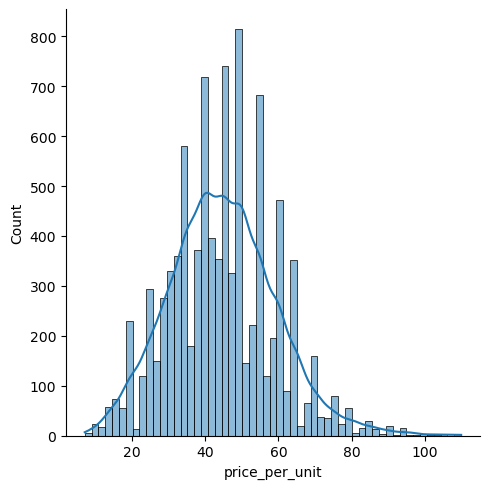

In [181]:
#Resampling
sns.displot(df.price_per_unit, kde=True, label='penjualan produk nike')

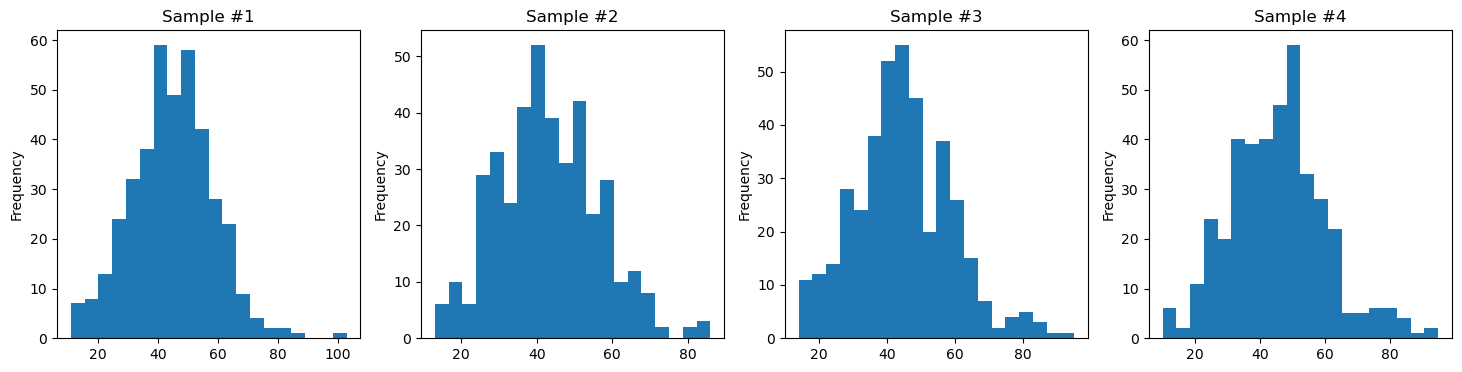

In [182]:
fig,ax = plt.subplots(ncols=4, figsize = (18,4))
for i in range(4):
  df.price_per_unit.sample(400).plot(kind='hist',bins=20,ax=ax[i])
  ax[i].set_title('Sample #{}'.format(i+1))

Kami mengambil 100 sampel secara acak dari data harga per unit dan melakukannya sebanyak 4 kali. Visualisasi menunjukkan bahwa distribusinya terlihat sama. Hal ini terjadi hanya karena faktor keacakan.

### Perhitungan Statistik Deskriptif ###


<Axes: >

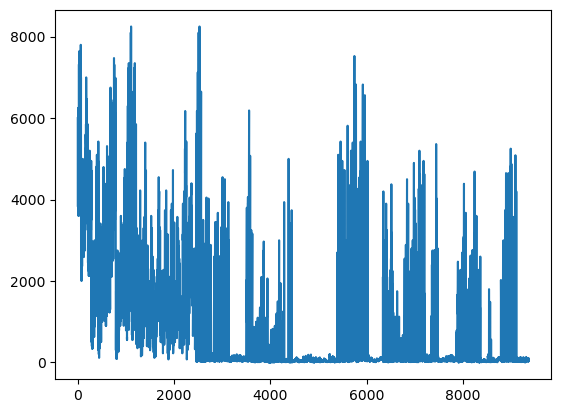

In [183]:
df['total_sales'].plot()

<Axes: >

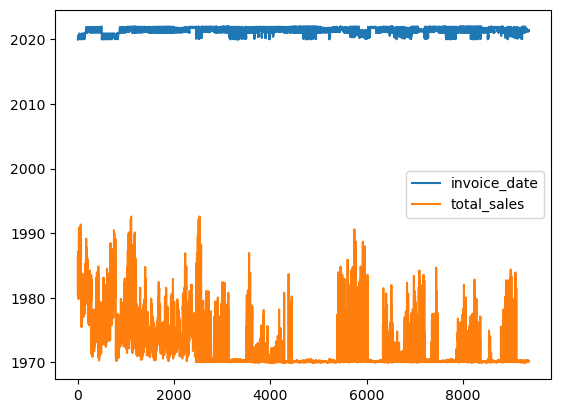

In [184]:
trend = df.drop(columns=['product', 'region', 'retailer', 'sales_method', 'state', 'price_per_unit', 'units_sold'])
trend.plot()

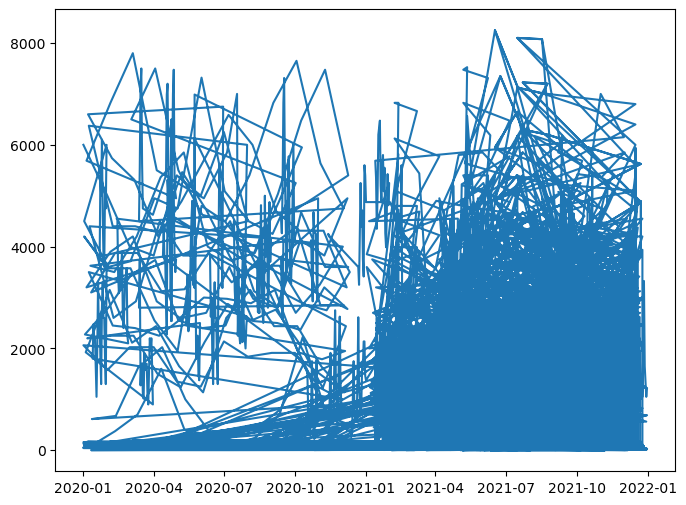

In [185]:
data = df["invoice_date"]
value = df["total_sales"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data, value)

```Time Series Decomposition```

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_date    9360 non-null   datetime64[ns]
 1   product         9360 non-null   object        
 2   region          9360 non-null   object        
 3   retailer        9360 non-null   object        
 4   sales_method    9360 non-null   object        
 5   state           9360 non-null   object        
 6   price_per_unit  9360 non-null   int64         
 7   total_sales     9360 non-null   int64         
 8   units_sold      9360 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 658.2+ KB


```
Penjabaran Masalah
```
Dari data yang ada didapatkan beberapa pertanyaan bisnis yang diantaranya:

- Apa produk yang paling laris terjual? deskriptip
- Bagaimana trend penjualan di tahun 2020 - 2021 setiap bulannya? deskriptip
- Produk apa yang paling sering terjual di setiap wilayah?
- Wilayah mana yang memiliki kontribusi terbesar terhadap total penjualan?
- Apakah ada perbedaan yang signifikan antara penjualan dengan sales method offline dan online? inversial 
- Apakah ada perbedaan rata-rata Total Sales di berbagai Region (Wilayah)? inversial 

### Apa produk yang paling laris terjual?

In [187]:
df['product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [190]:
df.head()

,invoice_date,product,region,retailer,sales_method,state,price_per_unit,total_sales,units_sold
0,2020-01-01,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,2020-02-01,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,2020-03-01,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,2020-04-01,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,2020-05-01,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90


In [191]:
df.groupby('product')['units_sold'].sum()

product
Men's Apparel                30085
Men's Athletic Footwear      42429
Men's Street Footwear        57737
Women's Apparel              42356
Women's Athletic Footwear    31068
Women's Street Footwear      38309
Name: units_sold, dtype: int64

### Produk apa yang paling sering terjual di setiap wilayah?

In [197]:
df.region.unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [198]:
df.groupby(['region', 'product'])['units_sold'].sum()

region     product                  
Midwest    Men's Apparel                 4572
           Men's Athletic Footwear       6550
           Men's Street Footwear        11028
           Women's Apparel               6991
           Women's Athletic Footwear     4534
           Women's Street Footwear       5730
Northeast  Men's Apparel                 6249
           Men's Athletic Footwear       8204
           Men's Street Footwear        13477
           Women's Apparel               9050
           Women's Athletic Footwear     5998
           Women's Street Footwear       7457
South      Men's Apparel                 6104
           Men's Athletic Footwear       9049
           Men's Street Footwear        10690
           Women's Apparel               8905
           Women's Athletic Footwear     6431
           Women's Street Footwear       8260
Southeast  Men's Apparel                 5468
           Men's Athletic Footwear       7140
           Men's Street Footwear         92

### Wilayah mana yang memiliki kontribusi terbesar terhadap total penjualan?

In [ ]:
df.region.unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [201]:
df.groupby('region')['total_sales'].sum().sort_values(ascending=False)

region
West         2329193
Northeast    1863429
Southeast    1631786
South        1446722
Midwest      1358145
Name: total_sales, dtype: int64

Apakah ada perbedaan yang signifikan antara penjualan dengan sales method offline dan online? inversial 

In [ ]:
online = df[df()]